In [ ]:
library(data.table)
library(pheatmap)
library(ComplexHeatmap)

In [22]:
spectra_fibro = data.frame(fread("results/cNMF_k17_spectra.csv", header=TRUE))
rownames(spectra_fibro) = spectra_fibro[, 1]
spectra_fibro = spectra_fibro[, -1]

In [15]:
#cnmf_spectra_fibro

In [24]:
spectra_martin = data.frame(fread("results/cNMF_martin_k19_spectra.csv", header=TRUE))
rownames(spectra_martin) = make.unique(spectra_martin[, 1])
spectra_martin = spectra_martin[, -1]

In [14]:
#cnmf_spectra_martin

In [26]:
# Overlapping genes
genes = intersect(rownames(spectra_fibro), rownames(spectra_martin))
length(genes)

In [35]:
# Match spectra to intersecting genes
spectra_fibro = spectra_fibro[match(genes, rownames(spectra_fibro)), ]
spectra_martin = spectra_martin[match(genes, rownames(spectra_martin)), ]

In [36]:
dim(spectra_martin)

[1] 14883    19

In [37]:
dim(spectra_fibro)

[1] 14883    17

In [57]:
# Rename labels for spetra indicating F for fibroblast and M for Martin
colnames(spectra_martin) = gsub("X", "M", colnames(spectra_martin))
colnames(spectra_fibro) = gsub("X", "F", colnames(spectra_fibro))

In [59]:
cmat = cor(spectra_fibro, spectra_martin, use='pairwise.complete.obs')

In [60]:
cmat

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19
F1,0.137841260,-0.081488303,0.07975486,-0.137795045,0.005406003,0.060120469,-0.051341837,0.192934961,-0.119437071,-0.032005606,-0.09774402,-0.047428597,-0.072273315,-0.105495618,-0.039288411,-0.03475736,0.0544703053,-0.034363192,-0.04718093
F2,0.029469830,-0.129401217,0.08229863,0.035317229,0.023742414,-0.071097816,-0.064754583,-0.086313572,-0.040720938,0.011988847,0.42461853,-0.089830573,-0.004410059,-0.075373124,-0.037947946,-0.01293560,-0.0360722155,-0.003683603,-0.04592186
F3,-0.026551795,0.236859967,-0.16130443,-0.280574715,-0.048468098,0.094548288,0.006086973,-0.071105466,0.013895531,-0.011958625,0.08685266,-0.229282675,0.006623014,-0.063883447,-0.070059251,0.08179102,0.0121284101,-0.005373938,0.02186617
F4,-0.112492418,-0.024410709,0.01212184,0.132802916,0.052546412,-0.099972033,0.032277070,-0.021474257,0.055730060,-0.028094567,0.01829041,0.469277972,0.015555464,-0.036107651,0.065468681,-0.02689675,-0.0461922332,0.001379721,0.05596496
F5,0.056502338,0.043649005,-0.02351186,-0.009703618,-0.030866797,0.097284677,0.002789966,0.065204560,-0.000859015,-0.074163081,-0.21952102,-0.046047579,-0.049767719,-0.044555908,0.017764410,-0.10094615,0.0478440036,0.038289809,-0.02861330
F6,0.017472877,-0.038031823,0.08104691,-0.029818048,0.034092998,-0.102344616,-0.033442160,-0.090941923,-0.009067597,-0.042565179,0.06700716,0.139168791,0.050785163,-0.064209090,-0.027808117,-0.02941141,-0.0211484164,-0.003185105,-0.00481695
F7,-0.081024271,0.016256168,0.02083992,0.165215878,0.031488739,-0.041625557,0.052671698,0.233507035,0.059270880,-0.050331137,-0.24727976,0.175083059,-0.076087544,-0.098613690,0.062089042,-0.12137712,-0.0273120230,0.002617521,0.04369931
F8,0.057409197,-0.076740126,0.03169195,0.023495020,-0.028266023,-0.026900293,-0.007029027,-0.142801935,-0.034246359,0.066800671,0.04899573,-0.023970154,0.090436363,-0.014746508,-0.013727572,0.11126950,0.0003157379,0.005791128,-0.02580331
F9,-0.065443051,-0.019728802,-0.05620299,0.086107399,0.026963101,-0.030110623,0.031472160,-0.004153335,0.076180803,0.069789451,0.02475288,0.150627722,0.106495878,-0.013890547,0.051576907,0.08305464,-0.0074268361,0.003123739,0.04936622
F10,0.034948827,-0.009677089,-0.02055308,-0.023761954,0.008070502,0.028380365,0.006187938,-0.064464573,0.018433065,0.009734508,0.02759235,-0.099230438,-0.021044453,0.001855865,0.023368709,0.01660780,0.0234368530,0.012580183,-0.01043373


In [78]:
#pheatmap(cmat)

pdf 
  3

png 
  2

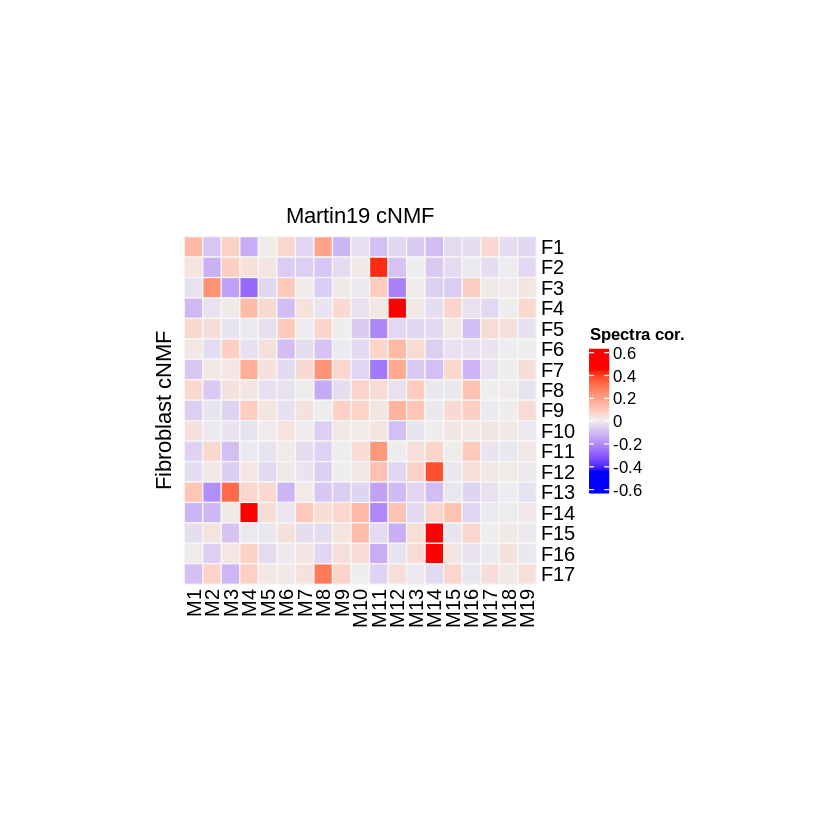

In [125]:
Heatmap(
    cmat,
    # border between cells
    rect_gp = gpar(col="gray97", lwd=1),
    row_title = "Fibroblast cNMF",
    column_title = "Martin19 cNMF",
    cluster_rows=FALSE,
    cluster_columns=FALSE,
    heatmap_height = unit(9, "cm"),
    heatmap_width = unit(9, "cm"),
    heatmap_legend_param=list(title='Spectra cor.')
)

dev.copy(pdf, "figures/cNMF_martin_comparison_heatmap.pdf")
dev.off()

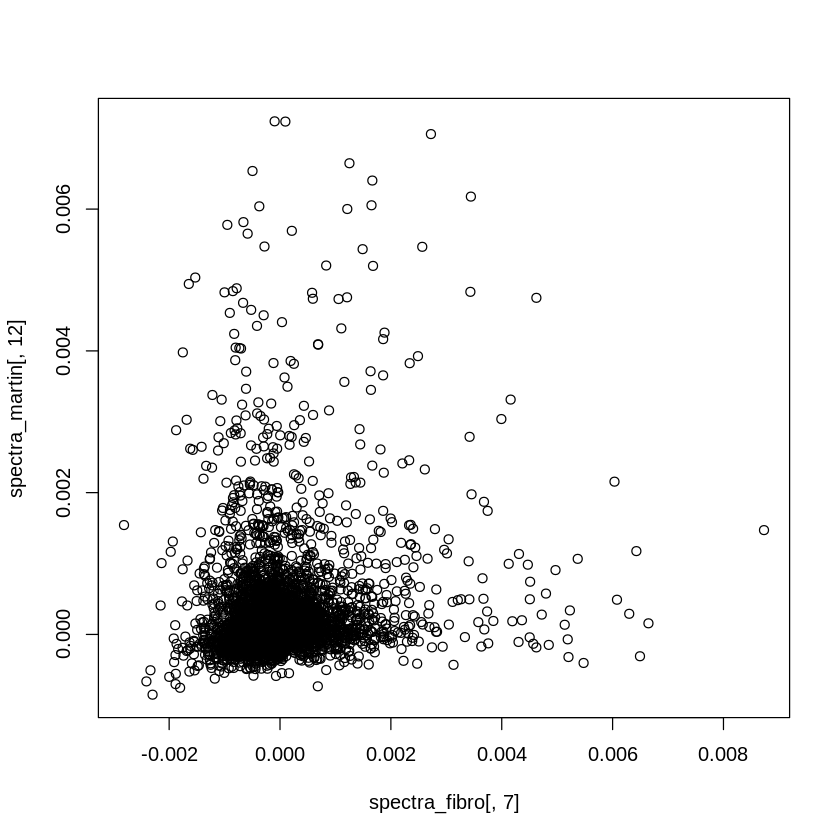

In [114]:
plot(spectra_fibro[, 7], spectra_martin[, 12])

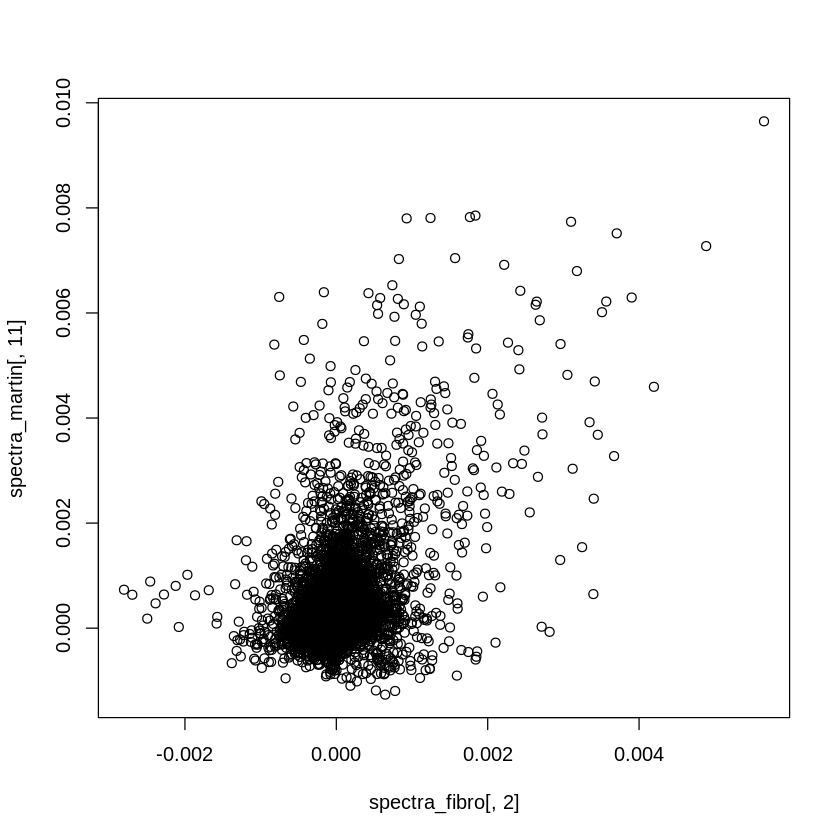

In [118]:
plot(spectra_fibro[, 2], spectra_martin[, 11])

In [116]:
cor.test(spectra_fibro[, 7], spectra_martin[, 12])


	Pearson's product-moment correlation

data:  spectra_fibro[, 7] and spectra_martin[, 12]
t = 21.644, df = 14814, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1594302 0.1906479
sample estimates:
      cor 
0.1750831 



	Pearson's product-moment correlation

data:  spectra_fibro[, 4] and spectra_martin[, 12]
t = 64.682, df = 14814, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4566261 0.4817401
sample estimates:
     cor 
0.469278 


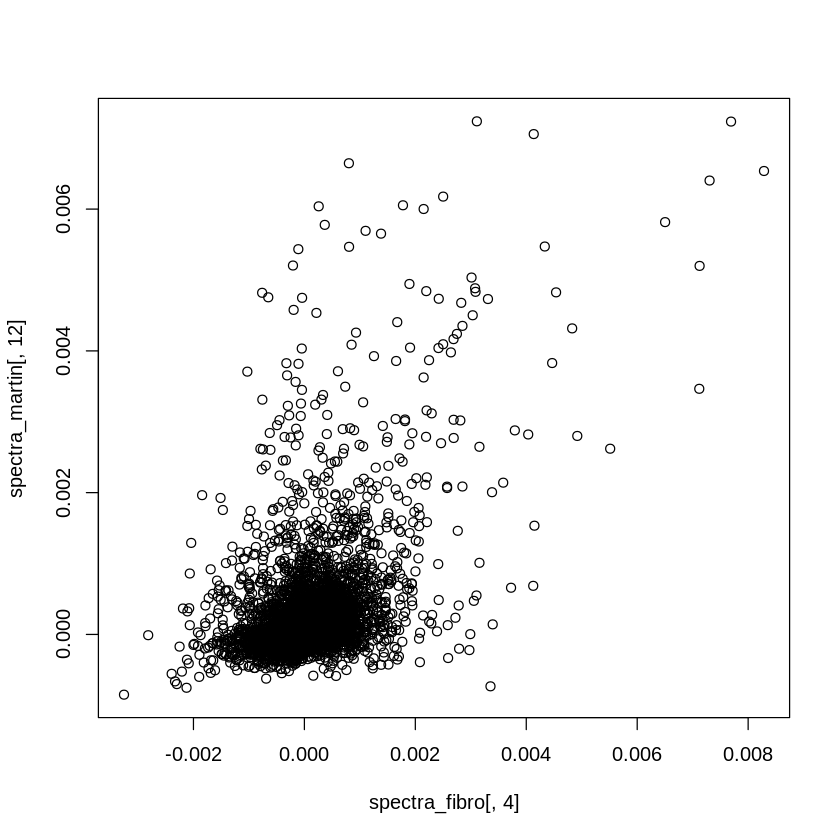

In [117]:
plot(spectra_fibro[, 4], spectra_martin[, 12])
cor.test(spectra_fibro[, 4], spectra_martin[, 12])


	Pearson's product-moment correlation

data:  spectra_fibro[, 7] and spectra_martin[, 8]
t = 29.229, df = 14814, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2182252 0.2486744
sample estimates:
     cor 
0.233507 


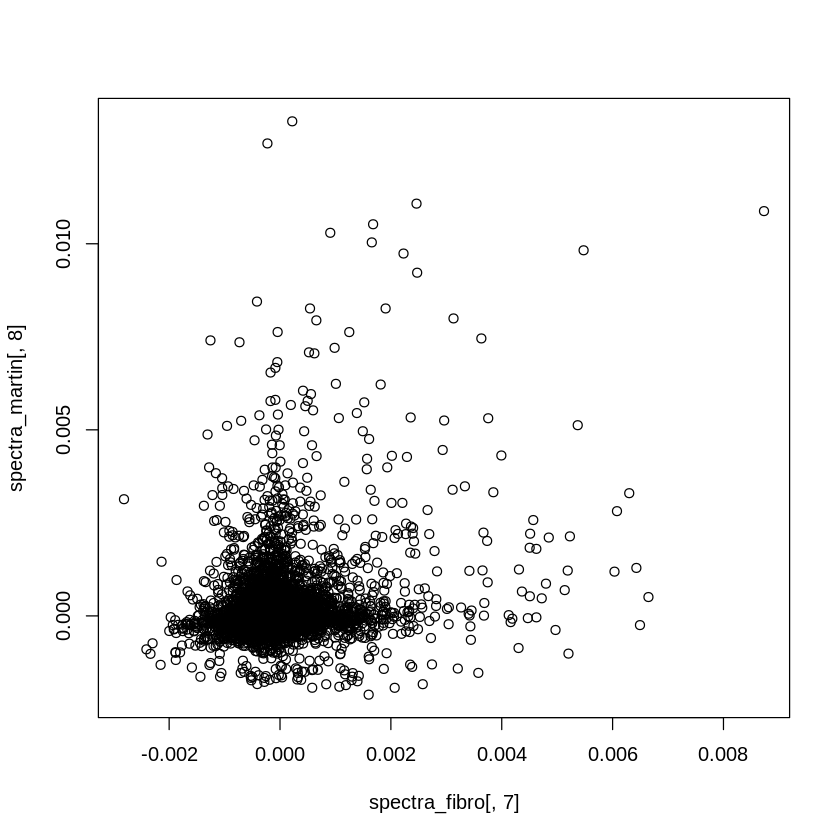

In [128]:
plot(spectra_fibro[, 7], spectra_martin[, 8])
cor.test(spectra_fibro[, 7], spectra_martin[, 8])